In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from newsapi import NewsApiClient
import os
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import re
current_directory = os.getcwd()

#topics = ['gun ownership', 'mass shooting', 'hunting', 'second amendment','freedom']

pos_topics = [
    'Self-defense', 'Second Amendment rights', 'personal freedom', 'home protection', 'sport shooting', 'hunting'
]

neg_topics = [
    'Gun violence', 'mass shootings', 'accidental shootings', 'crime', 'suicide', 'gun control', 'public safety'
]

topics = pos_topics + neg_topics

In [59]:
url = 'https://giffords.org/lawcenter/resources/scorecard2020/#rankings'


In [62]:
#Make a get request to retrieve the page
html_page = requests.get(url) 

#Pass the page contents to beautiful soup for parsing
soup = BeautifulSoup(html_page.content, 'html.parser') 

# States use the 'strong' tag
tables = soup.find_all('table')


In [63]:
state_rankings_2020 = {'Year': [], 'State':[], 'Grade': [], 'State_GPA': [], 'Gun_Death_Rate': []}
# Define grading scale
grades = {'A':4, 'A-': 3.7, 
          'B+': 3.3, 'B': 3, 'B-':2.7, 
          'C+': 2.3, 'C': 2, 'C-': 1.7, 
          'D+': 1.3, 'D': 1, 'D-': .7, 'F': 0}

# Iterate through each row of table and save to dictionary
for i in range(50):
    state_rankings_2020['Year'].append(2020)
    state_rankings_2020['State'].append(tables[0].find_all('td')[5 * i + 1].text)
    state_rankings_2020['Grade'].append(tables[0].find_all('td')[5 * i + 2].text)
    state_rankings_2020['State_GPA'].append(grades[state_rankings_2020['Grade'][-1]])
    state_rankings_2020['Gun_Death_Rate'].append(float(tables[0].find_all('td')[5 * i + 4].text))

# Create dataframe from dictionary
pd.DataFrame.from_dict(state_rankings_2020).to_csv('./giffords_2020.csv')

In [64]:
state_rankings_2020 = pd.read_csv('./giffords_2020.csv', index_col=0)
state_rankings_2020.head()

,Year,State,Grade,State_GPA,Gun_Death_Rate
0,2020,Alabama,F,0.0,22.17
1,2020,Alaska,F,0.0,24.49
2,2020,Arizona,F,0.0,15.05
3,2020,Arkansas,F,0.0,19.26
4,2020,California,A,4.0,7.21


In [21]:
state_rankings_2020.describe()

,Year,State_GPA,Gun_Death_Rate
count,50.0,50.000000,50.000000
mean,2020.0,1.448000,13.413600
std,0.0,1.470699,5.458588
min,2020.0,0.000000,3.390000
25%,2020.0,0.000000,10.300000
50%,2020.0,1.000000,12.735000
75%,2020.0,2.300000,16.410000
max,2020.0,4.000000,24.490000


In [3]:
from nltk.stem import WordNetLemmatizer 
LEMMER = WordNetLemmatizer() 

from nltk.stem.porter import PorterStemmer
STEMMER=PorterStemmer()

def MY_STEMMER(str_input):
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()
    words = [STEMMER.stem(word) for word in words]
    return words

def MY_LEMMER(str_input):
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()
    words = [LEMMER.lemmatize(word) for word in words]
    return words

In [4]:
print(current_directory)

/home/akhil/CUB/Spring 2023/TM/TM_project


In [3]:
topics

['Self-defense',
 'Second Amendment rights',
 'personal freedom',
 'home protection',
 'sport shooting',
 'hunting',
 'Gun violence',
 'mass shootings',
 'accidental shootings',
 'crime',
 'suicide',
 'gun control',
 'public safety']

In [21]:
newsapi = NewsApiClient(api_key='76acda18a67042c3b2e0568a00b9d8cf')


In [10]:
newsapi = NewsApiClient(api_key='76acda18a67042c3b2e0568a00b9d8cf')

#within the current folder, this code creates a new folder called corpus and then makes 
# one folder for each of the topic and stores the respective files within them.
for topic in topics:
    all_articles = newsapi.get_everything(q=topic,
                                      page_size=100)
    corpus_directory = os.path.join(current_directory, "corpus")
    if not os.path.exists(corpus_directory):
        os.makedirs(corpus_directory)
    corpus_directory = os.path.join(corpus_directory, topic)
    if not os.path.exists(corpus_directory):
        os.makedirs(corpus_directory)
    file_count = 0
    for article in all_articles['articles']:
        description = article['description']
        file_count += 1
        filename= topic+str(file_count)+".txt"
        MyFile=open(corpus_directory + "/" + filename,"w+")
        MyFile.write(description or "")
        MyFile.close()


In [29]:
all_google_results = []
all_google_labels = []
for topic in topics:
    all_articles = newsapi.get_everything(q=topic,
                                      page_size=100)
    corpus_directory = os.path.join(current_directory, "corpus")
    if not os.path.exists(corpus_directory):
        os.makedirs(corpus_directory)
    #corpus_directory = os.path.join(corpus_directory, topic)
    #if not os.path.exists(corpus_directory):
    #    os.makedirs(corpus_directory)
    file_count = 0
    for article in all_articles['articles']:
        description = article['description']
        if description:
            all_google_results.append(description)
        file_count += 1
        filename= topic+str(file_count)+".txt"
#         MyFile=open(corpus_directory + "/" + filename,"w+")
#         MyFile.write(description or "")
#         MyFile.close()
    googlenews.get_news(topic)
    google_results = googlenews.get_texts()
    all_google_results.extend(google_results)
    #all_google_labels.extend([topic]*len(google_results))
    
    o_file_count = 0
    for article in google_results:
        if o_file_count == 100:
            break
        description = article
        file_count += 1
        o_file_count+= 1
        filename= topic+str(file_count)+".txt"
#         MyFile=open(corpus_directory + "/" + filename,"w+")
#         MyFile.write(description or "")
#         MyFile.close()

https://news.google.com/search?q=Self-defense&hl=en
https://news.google.com/search?q=Second%2BAmendment%2Brights&hl=en
https://news.google.com/search?q=personal%2Bfreedom&hl=en
https://news.google.com/search?q=home%2Bprotection&hl=en
https://news.google.com/search?q=sport%2Bshooting&hl=en
https://news.google.com/search?q=hunting&hl=en
https://news.google.com/search?q=Gun%2Bviolence&hl=en
https://news.google.com/search?q=mass%2Bshootings&hl=en
https://news.google.com/search?q=accidental%2Bshootings&hl=en
https://news.google.com/search?q=crime&hl=en
https://news.google.com/search?q=suicide&hl=en
https://news.google.com/search?q=gun%2Bcontrol&hl=en
https://news.google.com/search?q=public%2Bsafety&hl=en


In [30]:
all_google_results


['The Defense Advanced Research Projects Agency (DARPA) announced it has developed an Artificial Intelligence (AI) algorithm for a self-flying F-16 fighter jet less than three years after creating the control simulated F-16 jet.Read more...',
 'Ukraine’s spirited defense has inspired the world—we must not self-deter from enabling Ukraine to defeat Putin’s invasion.',
 'Last week, an unidentified object appeared 60,000 feet above the ground in Montana. Originating from China, the balloon gave all the appearance of being a spying aircraft. Read more...',
 'Electric carmaker Tesla will face a hit on Super Bowl Sunday, when an ad will play showing the alleged dangers of its Full Self-Driving technology.',
 'A court has issued strict limits on how police can pull innocent bystanders into big data investigations.',
 'The decision on whether Alex Murdaugh will take the stand in his own defense in his double-murder trial has yet to be made, a source tells CNN, saying it is likely Murdaugh will

In [34]:
pd.DataFrame(all_google_results).to_csv("cleaned_data_arm.csv", index=False, header=["Post"])

In [31]:
np.savetxt(CV_File, 
           all_google_results,
           delimiter =", ", 
           fmt ='% s')

In [6]:
corpus_path=os.path.join(current_directory, "corpus")
## Empty List 
all_file_names = [] 
CorpusNameList=os.listdir(corpus_path) 
ListOfCompleteFiles=[] 
MyLables = []
for folder_name in CorpusNameList: 
    next_corpus=corpus_path+"/"+str(folder_name) 
    for fname in os.listdir(next_corpus): 
            full_path=next_corpus+"/"+fname 
            ListOfCompleteFiles.append(full_path) 
            MyLables.append(folder_name)

In [39]:
# MyVect_CV=CountVectorizer(input="filename", stop_words="english", max_features=100) 

# Vect_CV = MyVect_CV.fit_transform(ListOfCompleteFiles) 
# ColumnNamesCV=MyVect_CV.get_feature_names_out() 
# CorpusDF_CV=pd.DataFrame(Vect_CV.toarray(),columns=ColumnNamesCV)
# for nextcol in CorpusDF_CV.columns: 
#     if(re.search(r'[^A-Za-z]+', nextcol)): 
#         CorpusDF_CV= CorpusDF_CV.drop([nextcol], axis=1)
# CorpusDF_CV.insert(0, 'LABEL', MyLables)
# print(CorpusDF_CV)

In [7]:
# using the regular expression r'\b[a-zA-Z]{4,10}\b' to drop the tokens instead on dropping them manually.
My_TF1=TfidfVectorizer(input="filename", stop_words="english",tokenizer=MY_STEMMER,token_pattern = r'\b[a-zA-Z]{4,10}\b', max_features=1000) 

X_TF1 = My_TF1.fit_transform(ListOfCompleteFiles) 


ColNames=My_TF1.get_feature_names_out()
CorpusDF_TF=pd.DataFrame(X_TF1.toarray(), columns=ColNames)
CorpusDF_TF.insert(loc=0, column='LABEL', value=MyLables)
print(CorpusDF_TF)

/home/akhil/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  

              LABEL    -   --  -year-old  abort  abov      abus  access  \
0      Self-defense  0.0  0.0        0.0    0.0   0.0  0.000000     0.0   
1      Self-defense  0.0  0.0        0.0    0.0   0.0  0.298898     0.0   
2      Self-defense  0.0  0.0        0.0    0.0   0.0  0.000000     0.0   
3      Self-defense  0.0  0.0        0.0    0.0   0.0  0.000000     0.0   
4      Self-defense  0.0  0.0        0.0    0.0   0.0  0.000000     0.0   
...             ...  ...  ...        ...    ...   ...       ...     ...   
1231  public safety  0.0  0.0        0.0    0.0   0.0  0.000000     0.0   
1232  public safety  0.0  0.0        0.0    0.0   0.0  0.000000     0.0   
1233  public safety  0.0  0.0        0.0    0.0   0.0  0.000000     0.0   
1234  public safety  0.0  0.0        0.0    0.0   0.0  0.000000     0.0   
1235  public safety  0.0  0.0        0.0    0.0   0.0  0.000000     0.0   

        accord  account  ...      work     world  worri  wors  wound  write  \
0     0.241570      

In [20]:
from GoogleNews import GoogleNews
googlenews = GoogleNews(lang='en', region='US',start='01/01/2023',end='02/01/2023')

In [8]:
all_google_results = []
all_google_labels = []
for topic in topics:
    googlenews.get_news(topic)
    google_results = googlenews.get_texts()
    #all_google_results.extend(google_results)
    #all_google_labels.extend([topic]*len(google_results))
    
    g_corpus_directory = os.path.join(current_directory, "g_corpus")
    if not os.path.exists(g_corpus_directory):
        os.makedirs(g_corpus_directory)
    g_corpus_directory = os.path.join(g_corpus_directory, topic)
    if not os.path.exists(g_corpus_directory):
        os.makedirs(g_corpus_directory)
    file_count = 0
    for article in google_results:
        if file_count == 100:
            break
        description = article
        file_count += 1
        filename= topic+str(file_count)+".txt"
        MyFile=open(g_corpus_directory + "/" + filename,"w+")
        MyFile.write(description or "")
        MyFile.close()

https://news.google.com/search?q=Self-defense&hl=en
https://news.google.com/search?q=Second%2BAmendment%2Brights&hl=en
https://news.google.com/search?q=personal%2Bfreedom&hl=en
https://news.google.com/search?q=home%2Bprotection&hl=en
https://news.google.com/search?q=sport%2Bshooting&hl=en
https://news.google.com/search?q=hunting&hl=en
https://news.google.com/search?q=Gun%2Bviolence&hl=en
https://news.google.com/search?q=mass%2Bshootings&hl=en
https://news.google.com/search?q=accidental%2Bshootings&hl=en
https://news.google.com/search?q=crime&hl=en
https://news.google.com/search?q=suicide&hl=en
https://news.google.com/search?q=gun%2Bcontrol&hl=en
https://news.google.com/search?q=public%2Bsafety&hl=en


In [40]:
corpus_path=os.path.join(current_directory, "g_corpus")
## Empty List 
all_file_names = [] 
CorpusNameList=os.listdir(corpus_path) 
ListOfCompleteFiles=[] 
MyLables = []        
for folder_name in CorpusNameList: 
    next_corpus=corpus_path+"/"+str(folder_name) 
    for fname in os.listdir(next_corpus): 
            full_path=next_corpus+"/"+fname 
            ListOfCompleteFiles.append(full_path) 
            MyLables.append(folder_name)

In [41]:
My_TF1_GN=TfidfVectorizer(input='filename',
                       stop_words='english',
                       tokenizer=MY_STEMMER,
                       token_pattern = r'\b[a-zA-Z]{4,10}\b',
                       max_features=1000)
X_TF1_GN=My_TF1_GN.fit_transform(ListOfCompleteFiles)
ColNames_GN=My_TF1_GN.get_feature_names_out()
CorpusDF_TF_GN=pd.DataFrame(X_TF1_GN.toarray(), columns=ColNames_GN)
CorpusDF_TF_GN.insert(loc=0, column='LABEL', value=MyLables)
print(CorpusDF_TF_GN)



/home/akhil/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  

              LABEL    -   --  -year  -year-old  abort  abov      abus  \
0      Self-defense  0.0  0.0    0.0        0.0    0.0   0.0  0.000000   
1      Self-defense  0.0  0.0    0.0        0.0    0.0   0.0  0.286434   
2      Self-defense  0.0  0.0    0.0        0.0    0.0   0.0  0.000000   
3      Self-defense  0.0  0.0    0.0        0.0    0.0   0.0  0.000000   
4      Self-defense  0.0  0.0    0.0        0.0    0.0   0.0  0.000000   
...             ...  ...  ...    ...        ...    ...   ...       ...   
2531  public safety  0.0  0.0    0.0        0.0    0.0   0.0  0.000000   
2532  public safety  0.0  0.0    0.0        0.0    0.0   0.0  0.000000   
2533  public safety  0.0  0.0    0.0        0.0    0.0   0.0  0.000000   
2534  public safety  0.0  0.0    0.0        0.0    0.0   0.0  0.000000   
2535  public safety  0.0  0.0    0.0        0.0    0.0   0.0  0.000000   

      access  accid  ...  world  world-japan  wound  write  written   wv  \
0        0.0    0.0  ...    0.0    

In [ ]:
links = [
    "https://giffords.org/lawcenter/gun-laws/second-amendment/the-supreme-court-the-second-amendment/",
    "https://www.americas1stfreedom.org/articles/2018/10/22/guns-made-america-great/",
    "https://www.vpc.org/studies/unsafe.htm"
]

In [80]:
response = requests.get("https://giffords.org/lawcenter/gun-laws/second-amendment/the-supreme-court-the-second-amendment/")
MyTXT=response.text

In [88]:
# MyTXT

In [87]:
# MyList=MyTXT.split(" ")

# MyVectLDA=CountVectorizer(input='content', stop_words="english")
# data_vectorized = MyVectLDA.fit_transform(MyList)
# ColumnNamesLDA=MyVectLDA.get_feature_names()
# #print(ColumnNamesLDA)
# FinalDF=pd.DataFrame(data_vectorized.toarray(),columns=ColumnNamesLDA)

# RemoveWords=["href", "class", "div", "block", "nav", "pagination", 
#              "space", "https", "http", "template", "squarespace", "id", "jpg", "image",
#              "header", "function", "folder"]


# for nextcol in FinalDF.columns:
#     if(re.search(r'[^A-Za-z]+', nextcol)):
#         #print(nextcol)
#         FinalDF=FinalDF.drop([nextcol], axis=1)
#     elif(len(str(nextcol))<6):
#         FinalDF=FinalDF.drop([nextcol], axis=1)
#     elif(len(str(nextcol))>15):
#         FinalDF=FinalDF.drop([nextcol], axis=1)
#     elif(nextcol in RemoveWords):
#         FinalDF=FinalDF.drop([nextcol], axis=1)
        

# print(FinalDF)

In [89]:
from GoogleNews import GoogleNews
# for nextcol in FinalDF.columns:
#     if(re.search(r'[^A-Za-z]+', nextcol)):
#         #print(nextcol)
#         FinalDF=FinalDF.drop([nextcol], axis=1)
#     elif(len(str(nextcol))<6):
#         FinalDF=FinalDF.drop([nextcol], axis=1)
#     elif(len(str(nextcol))>15):
#         FinalDF=FinalDF.drop([nextcol], axis=1)
#     elif(nextcol in RemoveWords):
#         FinalDF=FinalDF.drop([nextcol], axis=1)
# FinalDF.head()

In [10]:
a = CorpusDF_TF_GN
b = CorpusDF_TF

In [4]:
corpus_path=os.path.join(current_directory, "corpus")
## Empty List 
all_file_names = [] 
CorpusNameList=os.listdir(corpus_path) 
ListOfCompleteFiles=[] 
MyLables = []
for folder_name in CorpusNameList: 
    next_corpus=corpus_path+"/"+str(folder_name) 
    for fname in os.listdir(next_corpus): 
            full_path=next_corpus+"/"+fname 
            ListOfCompleteFiles.append(full_path) 
            MyLables.append(folder_name)

In [49]:
ListOfCompleteFiles[:15]

['/home/akhil/CUB/Spring 2023/TM/TM_project/corpus/Self-defense/Self-defense46.txt',
 '/home/akhil/CUB/Spring 2023/TM/TM_project/corpus/Self-defense/Self-defense100.txt',
 '/home/akhil/CUB/Spring 2023/TM/TM_project/corpus/Self-defense/Self-defense77.txt',
 '/home/akhil/CUB/Spring 2023/TM/TM_project/corpus/Self-defense/Self-defense32.txt',
 '/home/akhil/CUB/Spring 2023/TM/TM_project/corpus/Self-defense/Self-defense24.txt',
 '/home/akhil/CUB/Spring 2023/TM/TM_project/corpus/Self-defense/Self-defense92.txt',
 '/home/akhil/CUB/Spring 2023/TM/TM_project/corpus/Self-defense/Self-defense55.txt',
 '/home/akhil/CUB/Spring 2023/TM/TM_project/corpus/Self-defense/Self-defense87.txt',
 '/home/akhil/CUB/Spring 2023/TM/TM_project/corpus/Self-defense/Self-defense9.txt',
 '/home/akhil/CUB/Spring 2023/TM/TM_project/corpus/Self-defense/Self-defense98.txt',
 '/home/akhil/CUB/Spring 2023/TM/TM_project/corpus/Self-defense/Self-defense97.txt',
 '/home/akhil/CUB/Spring 2023/TM/TM_project/corpus/Self-defense/S

In [5]:
corpus_path=os.path.join(current_directory, "g_corpus")
## Empty List 
CorpusNameList=os.listdir(corpus_path) 
    
for folder_name in CorpusNameList: 
    next_corpus=corpus_path+"/"+str(folder_name)
    print(next_corpus)
    for fname in os.listdir(next_corpus):
            full_path=next_corpus+"/"+fname
            #print(full_path)
            ListOfCompleteFiles.append(full_path)
            #print(ListOfCompleteFiles[:1])
            MyLables.append(folder_name)

/home/akhil/CUB/Spring 2023/TM/TM_project/g_corpus/Self-defense
/home/akhil/CUB/Spring 2023/TM/TM_project/g_corpus/Second Amendment rights
/home/akhil/CUB/Spring 2023/TM/TM_project/g_corpus/home protection
/home/akhil/CUB/Spring 2023/TM/TM_project/g_corpus/accidental shootings
/home/akhil/CUB/Spring 2023/TM/TM_project/g_corpus/crime
/home/akhil/CUB/Spring 2023/TM/TM_project/g_corpus/hunting
/home/akhil/CUB/Spring 2023/TM/TM_project/g_corpus/gun control
/home/akhil/CUB/Spring 2023/TM/TM_project/g_corpus/personal freedom
/home/akhil/CUB/Spring 2023/TM/TM_project/g_corpus/Gun violence
/home/akhil/CUB/Spring 2023/TM/TM_project/g_corpus/suicide
/home/akhil/CUB/Spring 2023/TM/TM_project/g_corpus/mass shootings
/home/akhil/CUB/Spring 2023/TM/TM_project/g_corpus/sport shooting
/home/akhil/CUB/Spring 2023/TM/TM_project/g_corpus/public safety


In [7]:
len(ListOfCompleteFiles)

2536

In [10]:
My_TF1_final=TfidfVectorizer(input='filename',
                       stop_words='english',
                       token_pattern = r'\b[a-zA-Z]{4,10}\b',
                       max_features=1000)
X_TF1_final=My_TF1_final.fit_transform(ListOfCompleteFiles)
ColNames_final=My_TF1_final.get_feature_names_out()
CorpusDF_TF_final=pd.DataFrame(X_TF1_final.toarray(), columns=ColNames_final)

In [11]:
MyDTM = X_TF1_final.toarray() 
MyDTM_DF = CorpusDF_TF_final.copy()

In [12]:
MyDTM_DF

,abortion,abuse,abusive,access,accident,according,account,accused,acquittal,acquitted,...,worse,wounded,write,writes,written,yard,year,years,york,young
0,0.0,0.0,0.0,0.0,0.0,0.313963,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.412372,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2532,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2533,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2534,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
CorpusDF_TF_final.insert(loc=0, column='LABEL', value=MyLables)
print(CorpusDF_TF_final)

              LABEL  abortion  abuse  abusive  access  accident  according  \
0      Self-defense       0.0    0.0      0.0     0.0       0.0   0.313963   
1      Self-defense       0.0    0.0      0.0     0.0       0.0   0.000000   
2      Self-defense       0.0    0.0      0.0     0.0       0.0   0.000000   
3      Self-defense       0.0    0.0      0.0     0.0       0.0   0.000000   
4      Self-defense       0.0    0.0      0.0     0.0       0.0   0.412372   
...             ...       ...    ...      ...     ...       ...        ...   
2531  public safety       0.0    0.0      0.0     0.0       0.0   0.000000   
2532  public safety       0.0    0.0      0.0     0.0       0.0   0.000000   
2533  public safety       0.0    0.0      0.0     0.0       0.0   0.000000   
2534  public safety       0.0    0.0      0.0     0.0       0.0   0.000000   
2535  public safety       0.0    0.0      0.0     0.0       0.0   0.000000   

      account  accused  acquittal  ...  worse  wounded  write  

In [99]:
CorpusDF_TF_final.columns

Index(['LABEL', 'abortion', 'abuse', 'abusive', 'access', 'accident',
       'according', 'account', 'accused', 'acquittal',
       ...
       'worse', 'wounded', 'write', 'writes', 'written', 'yard', 'year',
       'years', 'york', 'young'],
      dtype='object', length=1001)

In [88]:
CorpusDF_TF_final = CorpusDF_TF_final.drop(['-', '--', '-year'], axis=1)

In [100]:
CorpusDF_TF_final

,LABEL,abortion,abuse,abusive,access,accident,according,account,accused,acquittal,...,worse,wounded,write,writes,written,yard,year,years,york,young
0,Self-defense,0.0,0.0,0.0,0.0,0.0,0.313963,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Self-defense,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Self-defense,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Self-defense,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Self-defense,0.0,0.0,0.0,0.0,0.0,0.412372,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,public safety,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2532,public safety,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2533,public safety,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2534,public safety,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
final_df = pd.merge(CorpusDF_TF, CorpusDF_TF_GN, on="LABEL")


In [12]:
final_df.head()

,LABEL,-_x,--,-year-old_x,abort,abov,abus_x,access,accord,account,...,wichita,wing,wink,woman_y,women_y,woonsocket,workout,world-japan,wv,yard
0,Self-defense,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.24157,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Self-defense,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.24157,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Self-defense,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.24157,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Self-defense,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.24157,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Self-defense,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.24157,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
final_df = final_df.drop(['-_x', '--', '-year-old_x'], axis=1)

In [20]:
final_df

,LABEL,abort,abov,abus_x,access,accord,account,accus_x,act_x,action,...,wichita,wing,wink,woman_y,women_y,woonsocket,workout,world-japan,wv,yard
0,Self-defense,0.0,0.0,0.0,0.0,0.24157,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Self-defense,0.0,0.0,0.0,0.0,0.24157,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Self-defense,0.0,0.0,0.0,0.0,0.24157,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Self-defense,0.0,0.0,0.0,0.0,0.24157,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Self-defense,0.0,0.0,0.0,0.0,0.24157,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123595,public safety,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123596,public safety,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123597,public safety,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123598,public safety,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
X = CorpusDF_TF_final.drop(['LABEL'], axis=1)

In [102]:
X

,abortion,abuse,abusive,access,accident,according,account,accused,acquittal,acquitted,...,worse,wounded,write,writes,written,yard,year,years,york,young
0,0.0,0.0,0.0,0.0,0.0,0.313963,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.412372,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2532,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2533,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2534,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.spatial.distance import cdist

In [103]:
features_x = X.columns
features_x

Index(['abortion', 'abuse', 'abusive', 'access', 'accident', 'according',
       'account', 'accused', 'acquittal', 'acquitted',
       ...
       'worse', 'wounded', 'write', 'writes', 'written', 'yard', 'year',
       'years', 'york', 'young'],
      dtype='object', length=1000)

In [104]:
distortions = []
inertias = []
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    inertias.append(kmeanModel.inertia_)


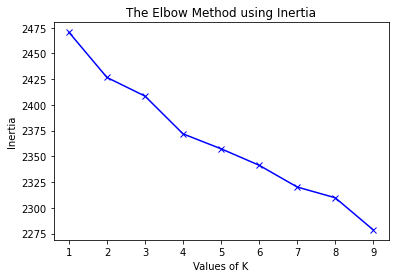

In [105]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [106]:
kmeanModel = KMeans(n_clusters=7).fit(X)
kmeanModel.fit(X)

KMeans(n_clusters=7)

In [34]:
labels = kmeanModel.labels_
labels

array([0, 1, 4, ..., 1, 2, 4], dtype=int32)

In [108]:
common_words = kmeanModel.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' )
    print(','.join(features_x[word] for word in centroid))

0 : 
killed,self,defense,claim,says,shooting,woman,boyfriend,road,shot,incident,police,columbus,cranberry,rage,rapper,attorneys,grand,deadly,opens,argue,manchester,records,jury,pregnant
1 : 
women,self,seminar,defense,class,money,sewing,fight,raises,lacrosse,teammate,fellow,deforest,raising,jujitsu,survivor,hide,outdated,protocol,crucial,club,learning,love,abuse,sale
2 : 
defense,self,shooting,campus,fatal,japan,stabbing,says,claims,jury,hooksett,training,accused,home,force,killing,charges,rules,podcast,jamestown,offers,cops,shoots,oakland,middle
3 : 
classes,hosts,defense,women,self,moratorium,eviction,wink,jackson,landlords,orland,pitbull,maine,amidst,pete,church,lgbtq,offers,hate,class,shooting,shot,murder,free,year
4 : 
class,defense,self,offered,free,landlords,unarmed,offers,fairmont,woman,woonsocket,mccc,taekwondo,column,community,hiding,inside,flushing,carjacking,knocks,destroy,kelce,travis,train,workout
5 : 
murder,claims,self,claimed,defense,trial,acquitted,shooting,case,polic

In [ ]:
##LDA

In [15]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD

In [16]:
MyDTM_DF

,abortion,abuse,abusive,access,accident,according,account,accused,acquittal,acquitted,...,worse,wounded,write,writes,written,yard,year,years,york,young
0,0.0,0.0,0.0,0.0,0.0,0.313963,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.412372,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2532,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2533,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2534,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
num_topics = 7

lda_model_DH = LatentDirichletAllocation(n_components=num_topics, 
                                         max_iter=100, learning_method='online')
#lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online')
LDA_DH_Model = lda_model_DH.fit_transform(MyDTM_DF)


In [18]:
import pyLDAvis.sklearn as LDAvis
import pyLDAvis
import pyLDAvis.gensim 
#conda install -c conda-forge pyldavis
pyLDAvis.enable_notebook() ## not using notebook
MyDTM_DF = np.matrix(MyDTM_DF)
panel = LDAvis.prepare(lda_model_DH, MyDTM_DF, My_TF1_final, mds='tsne')
pyLDAvis.show(panel)
panel = pyLDAvis.gensim.prepare(lda_model_DH, MyDTM, My_TF1_final, mds='tsne')
pyLDAvis.show(panel)


/home/akhil/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/akhil/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LatentDirichletAllocation was fitted with feature names
  warnings.warn(
/home/akhil/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/home/akhil/.local/lib/python3.10/site-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' w

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [06/Mar/2023 20:24:21] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Mar/2023 20:24:21] code 404, message Not Found
127.0.0.1 - - [06/Mar/2023 20:24:21] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [06/Mar/2023 20:27:27] "GET / HTTP/1.1" 200 -



stopping Server...


AttributeError: 'numpy.ndarray' object has no attribute 'tocsc'

In [19]:
print("SIZE: ", LDA_DH_Model.shape)  # (NO_DOCUMENTS, NO_TOPICS)

# Let's see how the first document in the corpus looks like in
## different topic spaces
print("First headline...")
print(LDA_DH_Model[0])
print("Sixth headline...")
print(LDA_DH_Model[5])


SIZE:  (2536, 7)
First headline...
[0.13495566 0.03613349 0.49951989 0.03639662 0.03602376 0.03627642
 0.22069416]
Sixth headline...
[0.04660018 0.04667621 0.04662064 0.59270432 0.04675114 0.04660008
 0.17404743]


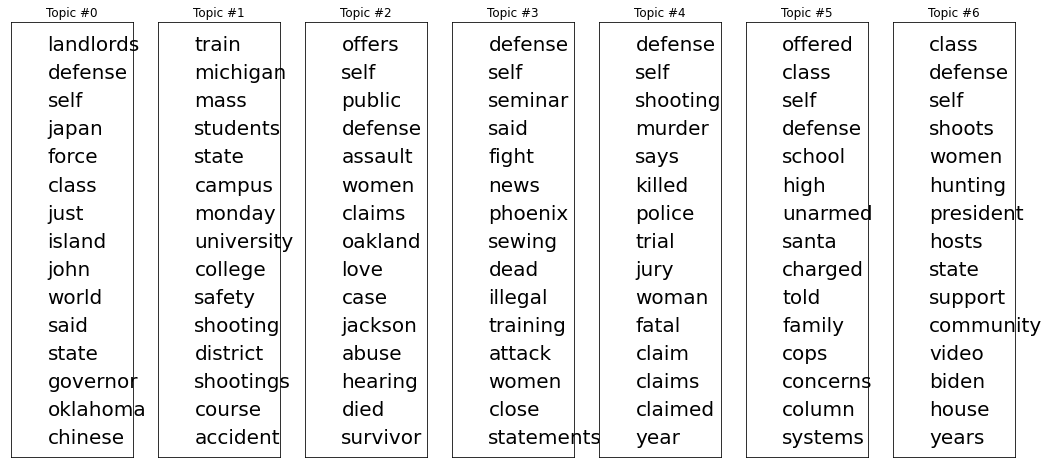

In [119]:
word_topic = np.array(lda_model_DH.components_)
#print(word_topic)
word_topic = word_topic.transpose()

num_top_words = 15
vocab_array = np.asarray(features_x)

#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 20
plt.figure(figsize=(18,8))
for t in range(num_topics):
    plt.subplot(1, num_topics, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base)
                 ##fontsize_base*share)

#plt.tight_layout()
plt.show()


TypeError: can only concatenate str (not "float") to str